               Date Time  Order Number        Activity     Server
0    2024-05-26 16:01:00             2          Seated  Barista D
1    2024-05-26 16:01:00             3          Seated  Barista E
2    2024-05-26 16:02:00             0          Seated  Barista C
3    2024-05-26 16:02:00             1          Seated  Barista B
4    2024-05-26 16:03:00             7          Seated  Barista F
...                  ...           ...             ...        ...
7995 2024-05-29 07:57:00           995    Drink Served  Barista D
7996 2024-05-29 08:01:00           995  Snack Prepared  Barista D
7997 2024-05-29 08:02:00           995    Snack Served  Barista D
7998 2024-05-29 08:03:00           995  Bill Delivered  Barista D
7999 2024-05-29 08:06:00           995       Bill Paid  Barista D

[8000 rows x 4 columns]


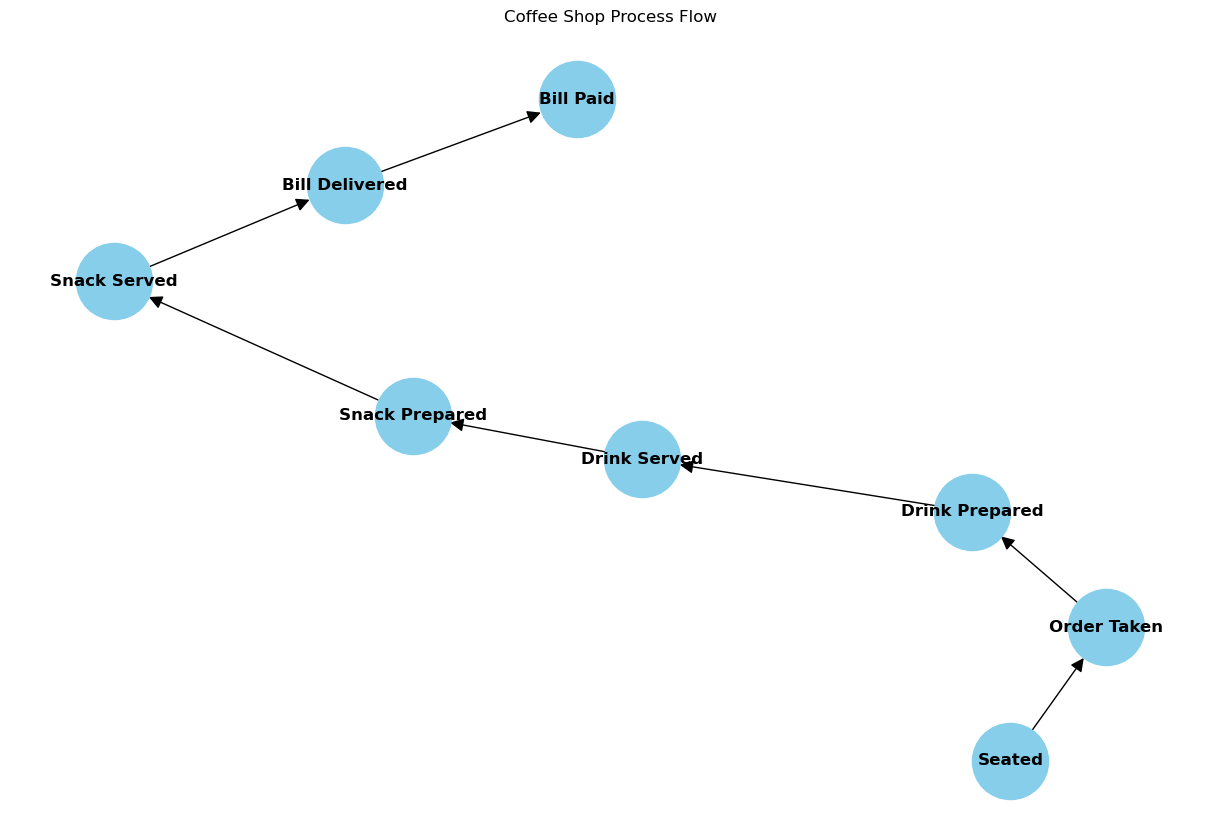

In [5]:
import simpy
import random
import pandas as pd
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the environment
env = simpy.Environment()

# Define the coffee shop process
class CoffeeShop:
    def __init__(self, env):
        self.env = env
        self.baristas = {
            'Barista A': simpy.Resource(env, capacity=1),
            'Barista B': simpy.Resource(env, capacity=1),
            'Barista C': simpy.Resource(env, capacity=1),
            'Barista D': simpy.Resource(env, capacity=1),
            'Barista E': simpy.Resource(env, capacity=1),
            'Barista F': simpy.Resource(env, capacity=1)
        }
        self.log = []

    def seat_customer(self, order_number, server):
        yield self.env.timeout(random.randint(1, 3))
        self.log.append([self.env.now, order_number, 'Seated', server])

    def take_order(self, order_number, server):
        yield self.env.timeout(random.randint(2, 5))
        self.log.append([self.env.now, order_number, 'Order Taken', server])

    def prepare_drink(self, order_number, server):
        yield self.env.timeout(random.randint(3, 7))
        self.log.append([self.env.now, order_number, 'Drink Prepared', server])

    def serve_drink(self, order_number, server):
        yield self.env.timeout(random.randint(1, 3))
        self.log.append([self.env.now, order_number, 'Drink Served', server])

    def prepare_snack(self, order_number, server):
        yield self.env.timeout(random.randint(2, 5))
        self.log.append([self.env.now, order_number, 'Snack Prepared', server])

    def serve_snack(self, order_number, server):
        yield self.env.timeout(random.randint(1, 3))
        self.log.append([self.env.now, order_number, 'Snack Served', server])

    def deliver_bill(self, order_number, server):
        yield self.env.timeout(random.randint(1, 2))
        self.log.append([self.env.now, order_number, 'Bill Delivered', server])

    def pay_bill(self, order_number, server):
        yield self.env.timeout(random.randint(1, 3))
        self.log.append([self.env.now, order_number, 'Bill Paid', server])

    def process_order(self, order_number, server):
        with self.baristas[server].request() as request:
            yield request
            yield self.env.process(self.seat_customer(order_number, server))
            yield self.env.process(self.take_order(order_number, server))
            yield self.env.process(self.prepare_drink(order_number, server))
            yield self.env.process(self.serve_drink(order_number, server))
            yield self.env.process(self.prepare_snack(order_number, server))
            yield self.env.process(self.serve_snack(order_number, server))
            yield self.env.process(self.deliver_bill(order_number, server))
            yield self.env.process(self.pay_bill(order_number, server))

def run_simulation():
    coffee_shop = CoffeeShop(env)
    servers = list(coffee_shop.baristas.keys())
    for i in range(1000):  # Simulate 1000 orders
        server = random.choice(servers)
        env.process(coffee_shop.process_order(i, server))
    env.run(until=5000)

    # Convert log to DataFrame and format timestamps
    df = pd.DataFrame(coffee_shop.log, columns=['Time', 'Order Number', 'Activity', 'Server'])
    start_time = datetime(2024, 5, 26, 16, 0)
    df['Date Time'] = df['Time'].apply(lambda x: start_time + timedelta(minutes=x))
    df = df[['Date Time', 'Order Number', 'Activity', 'Server']]

    return df

def create_process_graph(df):
    G = nx.DiGraph()
    
    # Add nodes and edges based on the activities
    activities = df['Activity'].unique()
    for i in range(len(activities) - 1):
        G.add_edge(activities[i], activities[i + 1])
    
    # Draw the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
    plt.title("Coffee Shop Process Flow")
    plt.show()

# Run the simulation and create the process graph
df_log = run_simulation()
print(df_log)
create_process_graph(df_log)

In [6]:
df_log.to_csv('simulation_log.csv', index=False)

In [7]:
!jupyter nbconvert --to pdf Final_project.ipynb

[NbConvertApp] Converting notebook Final_project.ipynb to pdf
[NbConvertApp] Support files will be in Final_project_files/
[NbConvertApp] Making directory ./Final_project_files
[NbConvertApp] Writing 36202 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 86180 bytes to Final_project.pdf
